In [53]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

In [54]:
miso_calculated_psi = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_ids_outrigger_calculated_psi.csv')
print(miso_calculated_psi.shape)
miso_calculated_psi.head()

(1926274, 5)


,sample_id,miso_id,outrigger_psi,notes,notes_abbrev
0,CVN_35,chr10:100150355:100150511:-@chr10:100148111:10...,NaN,Case 3: All junctions with insufficient reads,Case 3
1,CVN_17,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3: All junctions with insufficient reads,Case 3
2,CVN_35,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3: All junctions with insufficient reads,Case 3
3,M2nd_33,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3: All junctions with insufficient reads,Case 3
4,M2nd_34,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3: All junctions with insufficient reads,Case 3


In [55]:
miso_psi_filename = '/projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnms/splicing.csv.gz'
miso_psi = pd.read_csv(miso_psi_filename, index_col=0, compression='gzip')
print(miso_psi.shape)
miso_psi.head()

(275, 63201)


,chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,chr10:100150839:100150628|100150767:-@chr10:100150355:100150511:-,chr10:100170715:100170370|100170696:-@chr10:100167661:100167754:-,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,chr10:100185575:100185742:-@chr10:100185441|100185477:100185298:-,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,...,chrY:59222127:59222216|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222277|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,chrY:6780129:6780213:+@chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6889490:6889578:+@chrY:6893076:6893183:+@chrY:6911021:6911166:+,chrY:6931938:6932190:+@chrY:6934736:6934869:+@chrY:6938237:6938369:+,chrY:9236076-9236162:+@chrY:9236424-9236561:+,chrY:9365535-9365621:+@chrY:9365883-9366020:+
M1_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.87,0.82,0.94,0.97,NaN,NaN,NaN,NaN,NaN,NaN
M1_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
miso_psi_tidy = miso_psi.unstack().reset_index()
miso_psi_tidy = miso_psi_tidy.rename(columns={'level_0':'miso_id', 'level_1':'sample_id', 0:'miso_psi'})
print(miso_psi_tidy.shape)
# miso_psi_tidy = miso_psi_tidy.dropna()
print(miso_psi_tidy.shape)
miso_psi_tidy.head()

(17380275, 3)
(17380275, 3)


,miso_id,sample_id,miso_psi
0,chr10:100148111:100148265:-@chr10:100147622:10...,M1_01,NaN
1,chr10:100148111:100148265:-@chr10:100147622:10...,M1_02,NaN
2,chr10:100148111:100148265:-@chr10:100147622:10...,M1_03,NaN
3,chr10:100148111:100148265:-@chr10:100147622:10...,M1_04,NaN
4,chr10:100148111:100148265:-@chr10:100147622:10...,M1_05,NaN


In [57]:
figure_folder = 'figures/008_get_miso_false_positive_psi'
! mkdir -p $figure_folder

In [58]:
from __future__ import print_function

In [59]:
miso_calculated_psi.shape

(1926274, 5)

In [60]:
miso_psi_tidy.shape

(17380275, 3)

In [61]:
cols = ['miso_id', 'sample_id']

miso_psi_comparison = miso_psi_tidy.merge(miso_calculated_psi, left_on=cols, right_on=cols)
print(miso_psi_comparison.shape)
miso_psi_comparison.head()

(1925988, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3
1,chr10:100174766:100174978:-@chr10:100174489:10...,M2nd_34,NaN,NaN,Case 3: All junctions with insufficient reads,Case 3
2,chr10:100174766:100174978:-@chr10:100174489:10...,M2nd_33,NaN,NaN,Case 3: All junctions with insufficient reads,Case 3
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3
4,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_35,NaN,NaN,Case 3: All junctions with insufficient reads,Case 3


In [62]:
miso_psi_comparison_dropna = miso_psi_comparison.dropna(subset=['miso_psi', 'outrigger_psi'], how='all')
print(miso_psi_comparison_dropna.shape)
miso_psi_comparison_dropna.head()

(1445316, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3
5,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4
6,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3
7,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7


In [63]:
miso_psi_comparison_dropna.groupby('notes').size()

notes
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads       34533
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       357
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                   25
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                 17
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              117367
Case 2: Zero observed reads                                                                                                               2834
Case 3: All junctions with insufficient reads                                                                                           

In [64]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

In [65]:
miso_psi_comparison_dropna.shape

(1445316, 6)

In [66]:
miso_junction_reads2d = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_junction_reads2d.csv')
print(miso_junction_reads2d.shape)
miso_junction_reads2d.head()

(1926274, 9)


,sample_id,miso_id,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,CVN_35,chr10:100150355:100150511:-@chr10:100148111:10...,NaN,9.0,NaN,NaN,NaN,NaN,SE
1,CVN_17,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,7.0,NaN,NaN,NaN,NaN,SE
2,CVN_35,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,8.0,NaN,NaN,NaN,NaN,SE
3,M2nd_33,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,2.0,NaN,NaN,NaN,NaN,SE
4,M2nd_34,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,4.0,NaN,NaN,NaN,NaN,SE


In [67]:
cols = ['miso_id', 'sample_id']
miso_psi_comparison_dropna_junctions = miso_psi_comparison_dropna.merge(miso_junction_reads2d, left_on=cols, right_on=cols)
print(miso_psi_comparison_dropna_junctions.shape)
miso_psi_comparison_dropna_junctions.head()

(1445316, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,9.0,NaN,NaN,NaN,NaN,SE
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,7.0,NaN,NaN,NaN,NaN,SE
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4,NaN,NaN,NaN,23.0,NaN,NaN,SE
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3,5.0,NaN,NaN,NaN,NaN,NaN,SE
4,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,32.0,NaN,NaN,46.0,NaN,NaN,SE


In [68]:
miso_psi_comparison_dropna_junctions.to_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_psi_comparison_junction_reads2d.csv', 
                                            index=False)

In [69]:
miso_psi_outrigger_na = miso_psi_comparison_dropna_junctions.loc[miso_psi_comparison_dropna_junctions['outrigger_psi'].isnull()]
print(miso_psi_outrigger_na.shape)
miso_psi_outrigger_na.head()

(572973, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,9.0,NaN,NaN,NaN,NaN,SE
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,7.0,NaN,NaN,NaN,NaN,SE
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4,NaN,NaN,NaN,23.0,NaN,NaN,SE
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3,5.0,NaN,NaN,NaN,NaN,NaN,SE
6,chr10:100186972:100187021:-@chr10:100185575:10...,M4_05,0.82,NaN,Case 4: Only one junction with sufficient reads,Case 4,10.0,NaN,NaN,7.0,NaN,NaN,SE


In [70]:
miso_false_positive_percent = 100 * float(miso_psi_outrigger_na.shape[0])/miso_psi_comparison_dropna_junctions['miso_psi'].notnull().sum()
miso_false_positive_percent

45.719554368936684

In [71]:
sns.set(context='paper', style='white')

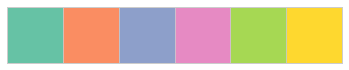

In [95]:
set2 = sns.color_palette('Set2')
sns.palplot(set2)
false_positive_color = set2[1]
false_negative_color = set2[0]

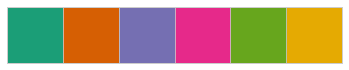

In [106]:
dark2 = sns.color_palette('Dark2')
sns.palplot(dark2)

false_positive_label = dark2[1]
false_negative_label = dark2[0]

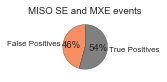

In [103]:
fig, ax = plt.subplots(figsize=(1, 1))
plt.pie([miso_false_positive_percent, 100-miso_false_positive_percent], startangle=90, 
        colors=[false_positive_color, 'grey'], 
        labels=['False Positives', 'True Positives'], autopct='%.0f%%')
ax.set(title='MISO SE and MXE events')
fig.savefig('{}/miso_false_positives_pie.pdf'.format(figure_folder))

In [73]:
miso_psi_outrigger_na.groupby('notes').size()

notes
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       357
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                 17
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              117367
Case 2: Zero observed reads                                                                                                               2834
Case 3: All junctions with insufficient reads                                                                                           130427
Case 4: Only one junction with sufficient reads                                                                                         280720
Case 5: Unequal read coverage (one side has at least 10x more reads)                                                                    

In [74]:
sns.set(context='paper', style='whitegrid')

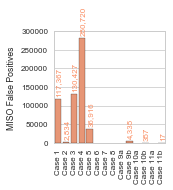

In [97]:
fig, ax = plt.subplots(figsize=(2, 2))

# outrigger_na_case_order = ['Case 3', 'Case 4', 'Case 6', 'Case 10b', 'Case 11b', 'Case 12b']

sns.countplot(x='notes_abbrev', data=miso_psi_outrigger_na, color=false_positive_color, order=case_order)

miso_psi_outrigger_na_sizes = miso_psi_outrigger_na.groupby('notes_abbrev').size()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
yoffset = 0.025 * ymax

for i, case in enumerate(case_order):
    if case in miso_psi_outrigger_na_sizes:
        y = miso_psi_outrigger_na_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_positive_label)
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set(xlabel='', ylabel='MISO False Positives')
fig.savefig('{}/outrigger_na_cases.pdf'.format(figure_folder))

In [76]:
rows = miso_psi_comparison_dropna_junctions['miso_psi'].isnull() & miso_psi_comparison_dropna_junctions['outrigger_psi'].notnull()
miso_na_outrigger_psi = miso_psi_comparison_dropna_junctions.loc[rows]
print(miso_na_outrigger_psi.shape)
miso_na_outrigger_psi.head()

(192082, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
9,chr10:100190328:100190427:-@chr10:100189548:10...,P1_06,NaN,1.0,Case 7: Inclusion,Case 7,12.0,NaN,NaN,11.0,NaN,NaN,SE
15,chr10:100190328:100190427:-@chr10:100189548:10...,P2_11,NaN,0.0,Case 6: Exclusion,Case 6,NaN,123.0,NaN,NaN,NaN,NaN,SE
19,chr10:100190328:100190427:-@chr10:100189548:10...,P7_11,NaN,0.0,Case 6: Exclusion,Case 6,NaN,12.0,NaN,NaN,NaN,NaN,SE
24,chr10:100190328:100190427:-@chr10:100189548:10...,P4_01,NaN,0.0,Case 6: Exclusion,Case 6,NaN,29.0,NaN,NaN,NaN,NaN,SE
38,chr10:100193697:100193848:-@chr10:100190888:10...,P2_10,NaN,1.0,Case 7: Inclusion,Case 7,228.0,NaN,NaN,300.0,NaN,NaN,SE


In [77]:
miso_na_outrigger_psi.groupby('notes').size()

notes
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads     7030
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                 4
Case 6: Exclusion                                                                                                                     92329
Case 7: Inclusion                                                                                                                     76035
Case 8: Sufficient reads on all junctions                                                                                              8036
Case 9a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are sufficient junction reads     8648
dtype: int64

In [78]:
miso_false_negative_percent = 100 * float(miso_na_outrigger_psi.shape[0])/miso_psi_comparison_dropna['outrigger_psi'].notnull().sum()
miso_false_negative_percent

22.01909111438964

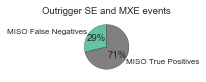

In [102]:
fig, ax = plt.subplots(figsize=(1, 1))
plt.pie([miso_false_negative_percent, 100-miso_false_positive_percent], startangle=90, 
        colors=[false_negative_color, 'grey'], 
        labels=['MISO False Negatives', 'MISO True Positives'], autopct='%.0f%%')
ax.set(title='Outrigger SE and MXE events')
fig.savefig('{}/miso_false_negatives_pie.pdf'.format(figure_folder))

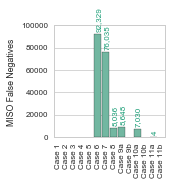

In [108]:
fig, ax = plt.subplots(figsize=(2, 2))

miso_na_case_order = ['Case 7', 'Case 8', 'Case 9', 'Case 10a', 'Case 11a', 'Case 12a']

sns.countplot(x='notes_abbrev', data=miso_na_outrigger_psi, color=false_negative_color, order=case_order)

miso_na_outrigger_psi_sizes = miso_na_outrigger_psi.groupby('notes_abbrev').size()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
yoffset = 0.025 * ymax

for i, case in enumerate(case_order):
    if case in miso_na_outrigger_psi_sizes:
        y = miso_na_outrigger_psi_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_negative_label)
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set(xlabel='', ylabel='MISO False Negatives')
fig.savefig('{}/miso_na_cases.pdf'.format(figure_folder))

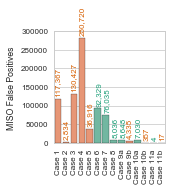

In [107]:
fig, ax = plt.subplots(figsize=(2, 2))

# outrigger_na_case_order = ['Case 3', 'Case 4', 'Case 6', 'Case 10b', 'Case 11b', 'Case 12b']

sns.countplot(x='notes_abbrev', data=miso_psi_outrigger_na, color=false_positive_color, order=case_order)
sns.countplot(x='notes_abbrev', data=miso_na_outrigger_psi, color=false_negative_color, order=case_order)

ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
yoffset = 0.025 * ymax


for i, case in enumerate(case_order):
    if case in miso_na_outrigger_psi_sizes:
        y = miso_na_outrigger_psi_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_negative_label)

for i, case in enumerate(case_order):
    if case in miso_psi_outrigger_na_sizes:
        y = miso_psi_outrigger_na_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.1, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_positive_label)
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set(xlabel='', ylabel='MISO False Positives')
fig.savefig('{}/miso_outrigger_na_cases.pdf'.format(figure_folder))

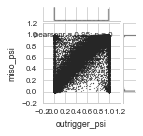

In [82]:
g = sns.jointplot('outrigger_psi', 'miso_psi', miso_psi_comparison_dropna, color='#262626', 
                  joint_kws=dict(alpha=0.5, rasterized=True, s=1), size=2)
g.savefig('{}/outrigger_vs_miso_psi.pdf'.format(figure_folder), dpi=300)

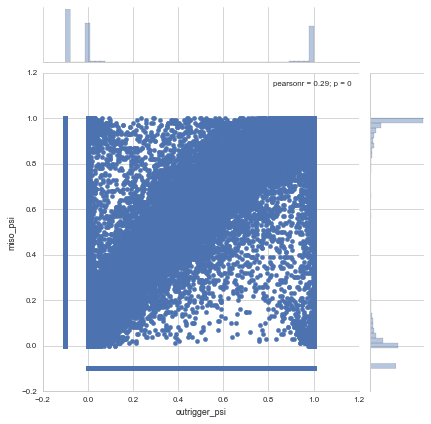

In [83]:
g = sns.jointplot('outrigger_psi', 'miso_psi', miso_psi_comparison_dropna.fillna(-0.1))

In [ ]:
miso_psi_comparison_dropna_fillna = miso_psi_comparison_dropna.fillna(-0.1)
print(miso_psi_comparison_dropna_fillna.shape)
miso_psi_comparison_dropna_fillna.head()

(1445316, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,-0.1,Case 3: All junctions with insufficient reads,Case 3
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,-0.1,Case 3: All junctions with insufficient reads,Case 3
5,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,-0.1,Case 4: Only one junction with sufficient reads,Case 4
6,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,-0.1,Case 3: All junctions with insufficient reads,Case 3
7,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7


In [ ]:
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

In [ ]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna, col='notes_abbrev', col_wrap=4, col_order=case_order, size=1.5)
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, color='#262626', rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/outrigger_vs_miso_psi_faceted.pdf'.format(figure_folder), dpi=300)

In [ ]:
miso_psi_comparison_dropna_fillna['either_na'] = "True Positive"
miso_psi_comparison_dropna_fillna.loc[miso_outrigger_comparison['outrigger_psi'].isnull(), 'either_na'] = 'False Positive'
miso_psi_comparison_dropna_fillna.loc[miso_outrigger_comparison['miso_psi'].isnull(), 'either_na'] = 'False Negative'
miso_psi_comparison_dropna_fillna.head()

In [ ]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna, col='notes_abbrev', 
                  col_wrap=4, col_order=case_order, size=1.5, hue='either_na', 
                  hue_order=['False Positive', 'False Negative', 'True Positive'],
                  palette=[false_positive_color, false_negative_color, '#262626'])
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/outrigger_vs_miso_psi_faceted_na_hue.pdf'.format(figure_folder), dpi=300)